In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits

from donutlib import decamutil
dinfo = decamutil.decaminfo()

In [2]:
hdu = fits.open("/u/ec/roodman/kipacdisk/PIFF/psf_y3a1-v29.fits")
hdu.info()

Filename: /u/ec/roodman/kipacdisk/PIFF/psf_y3a1-v29.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     42   56707987R x 17C   [D, D, D, D, D, D, D, D, D, D, D, D, D, J, I, 1A, I]   


In [4]:
# get the datatable
table = hdu[1].data
print(table.columns)
print(len(table))

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'obs_e1'; format = 'D'
    name = 'obs_e2'; format = 'D'
    name = 'obs_T'; format = 'D'
    name = 'piff_e1'; format = 'D'
    name = 'piff_e2'; format = 'D'
    name = 'piff_T'; format = 'D'
    name = 'mag'; format = 'D'
    name = 'fov_x'; format = 'D'
    name = 'fov_y'; format = 'D'
    name = 'exp'; format = 'J'
    name = 'ccd'; format = 'I'
    name = 'band'; format = '1A'
    name = 'tiling'; format = 'I'
)
56707987


In [6]:
# select just i band exposures
itable = table[(table['band']=='i')]
print(len(itable))

13434631


<IPython.core.display.Javascript object>


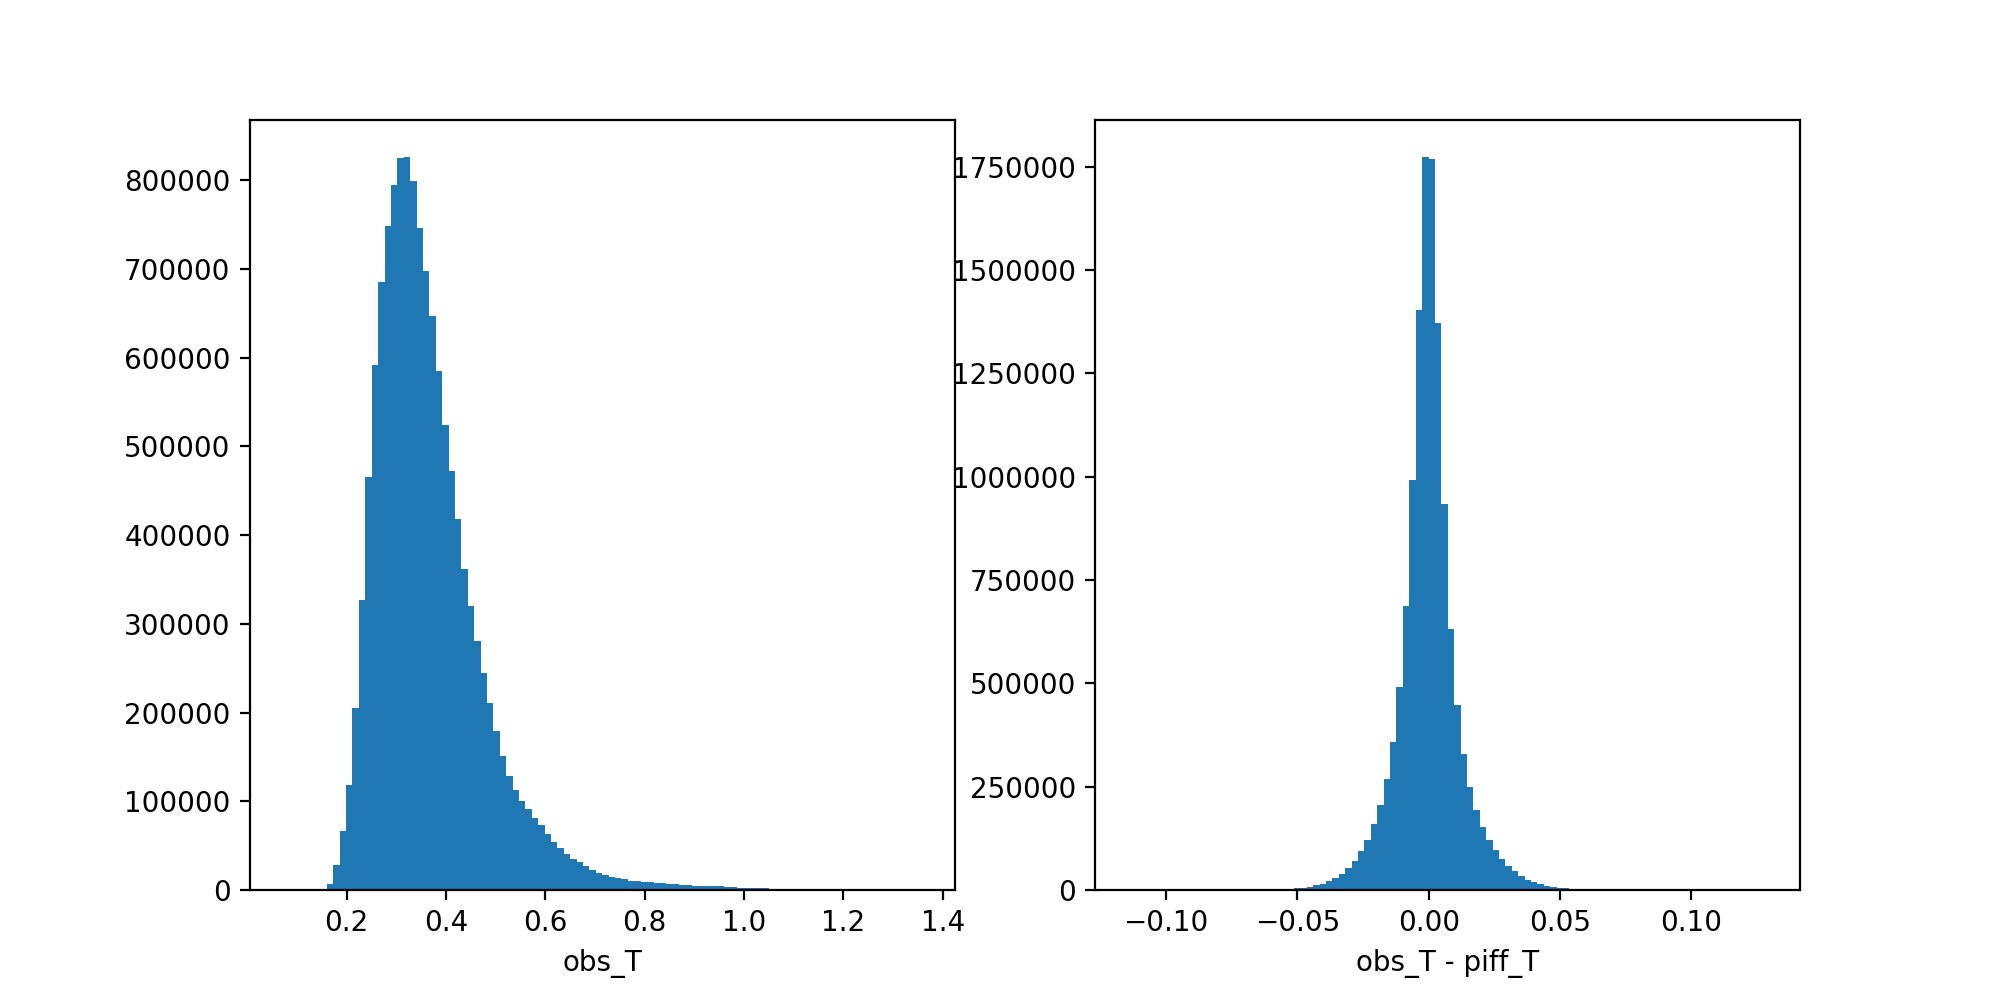

Text(0.5, 0, 'obs_T - piff_T')

In [8]:
# histogram obs_T - piff_T
f,ax = plt.subplots(1,2,figsize=(10,5))
h = ax[0].hist(itable['obs_T'],bins=100)
ax[0].set_xlabel('obs_T')
h = ax[1].hist(itable['obs_T']-itable['piff_T'],bins=100)
ax[1].set_xlabel('obs_T - piff_T')

<IPython.core.display.Javascript object>


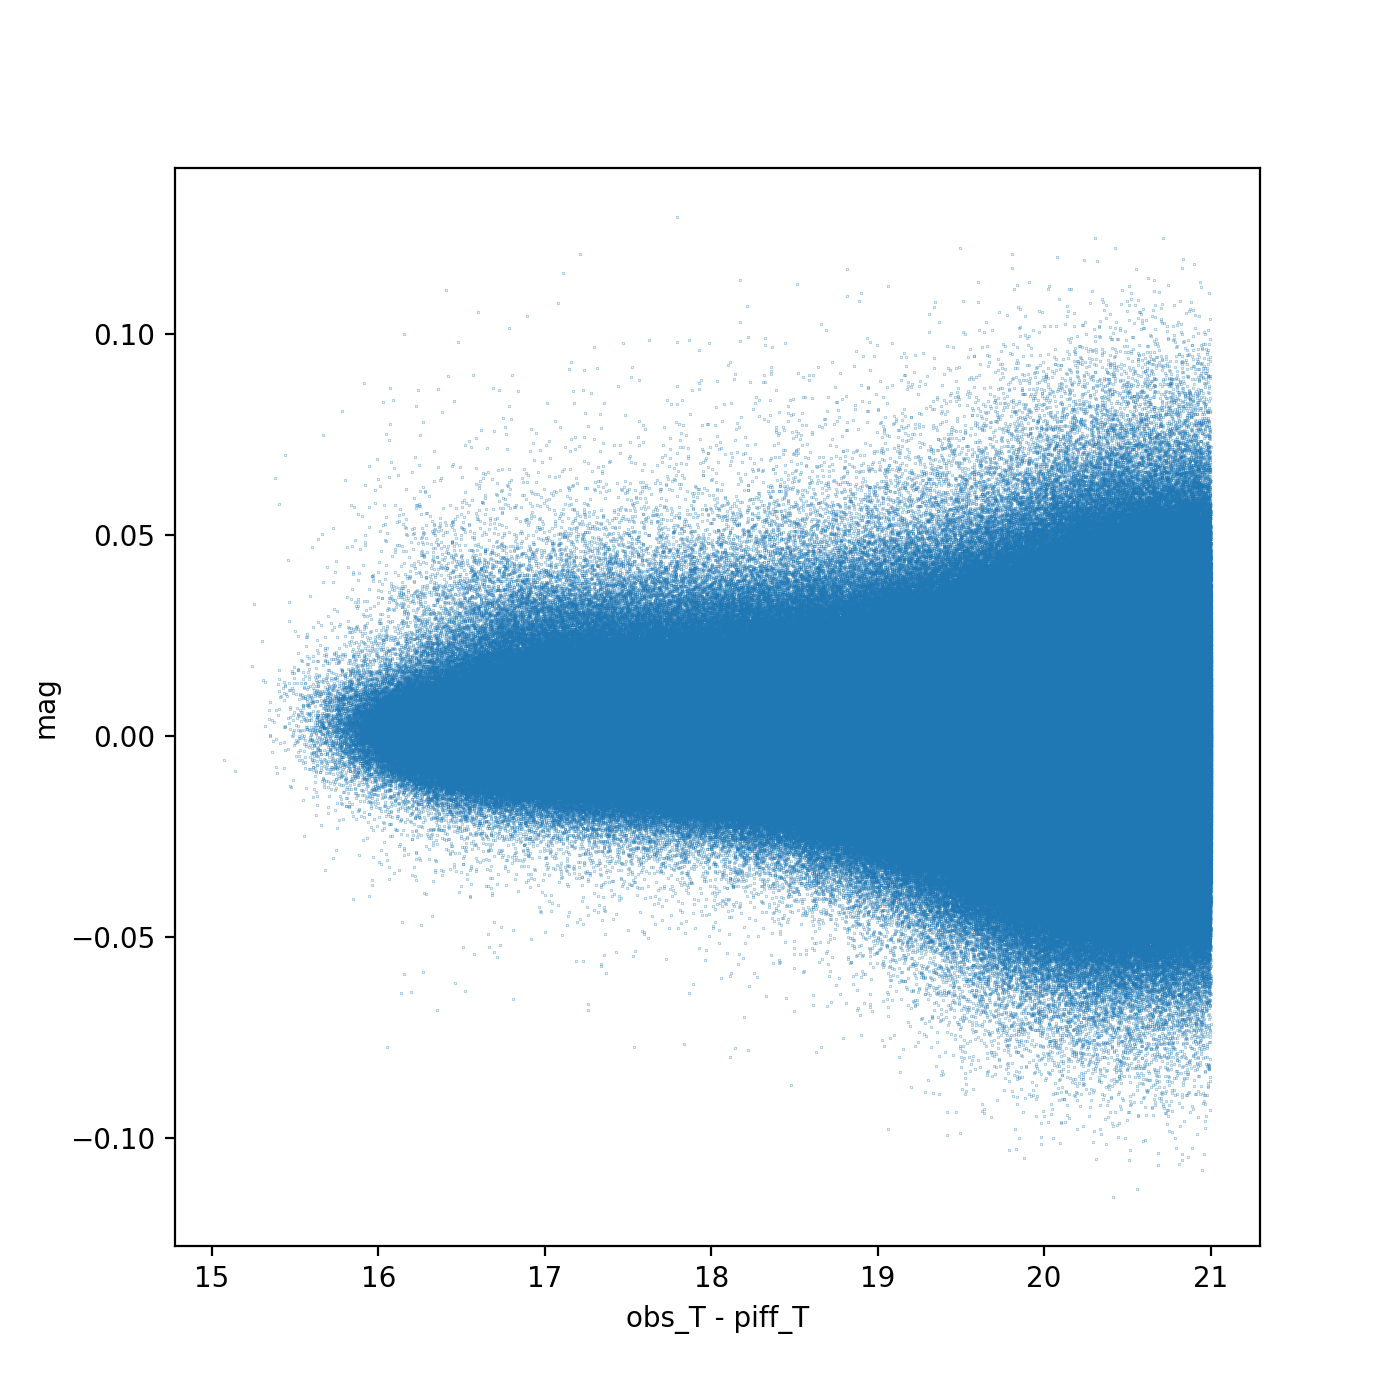

Text(0, 0.5, 'mag')

In [9]:
# scatter plot of mag vs. obs_T - piff_T 
f,ax = plt.subplots(1,1,figsize=(7,7))
h = ax.scatter(itable['mag'],itable['obs_T']-itable['piff_T'],marker='.',s=0.05)
ax.set_ylabel('obs_T - piff_T')
ax.set_xlabel('mag')

<IPython.core.display.Javascript object>


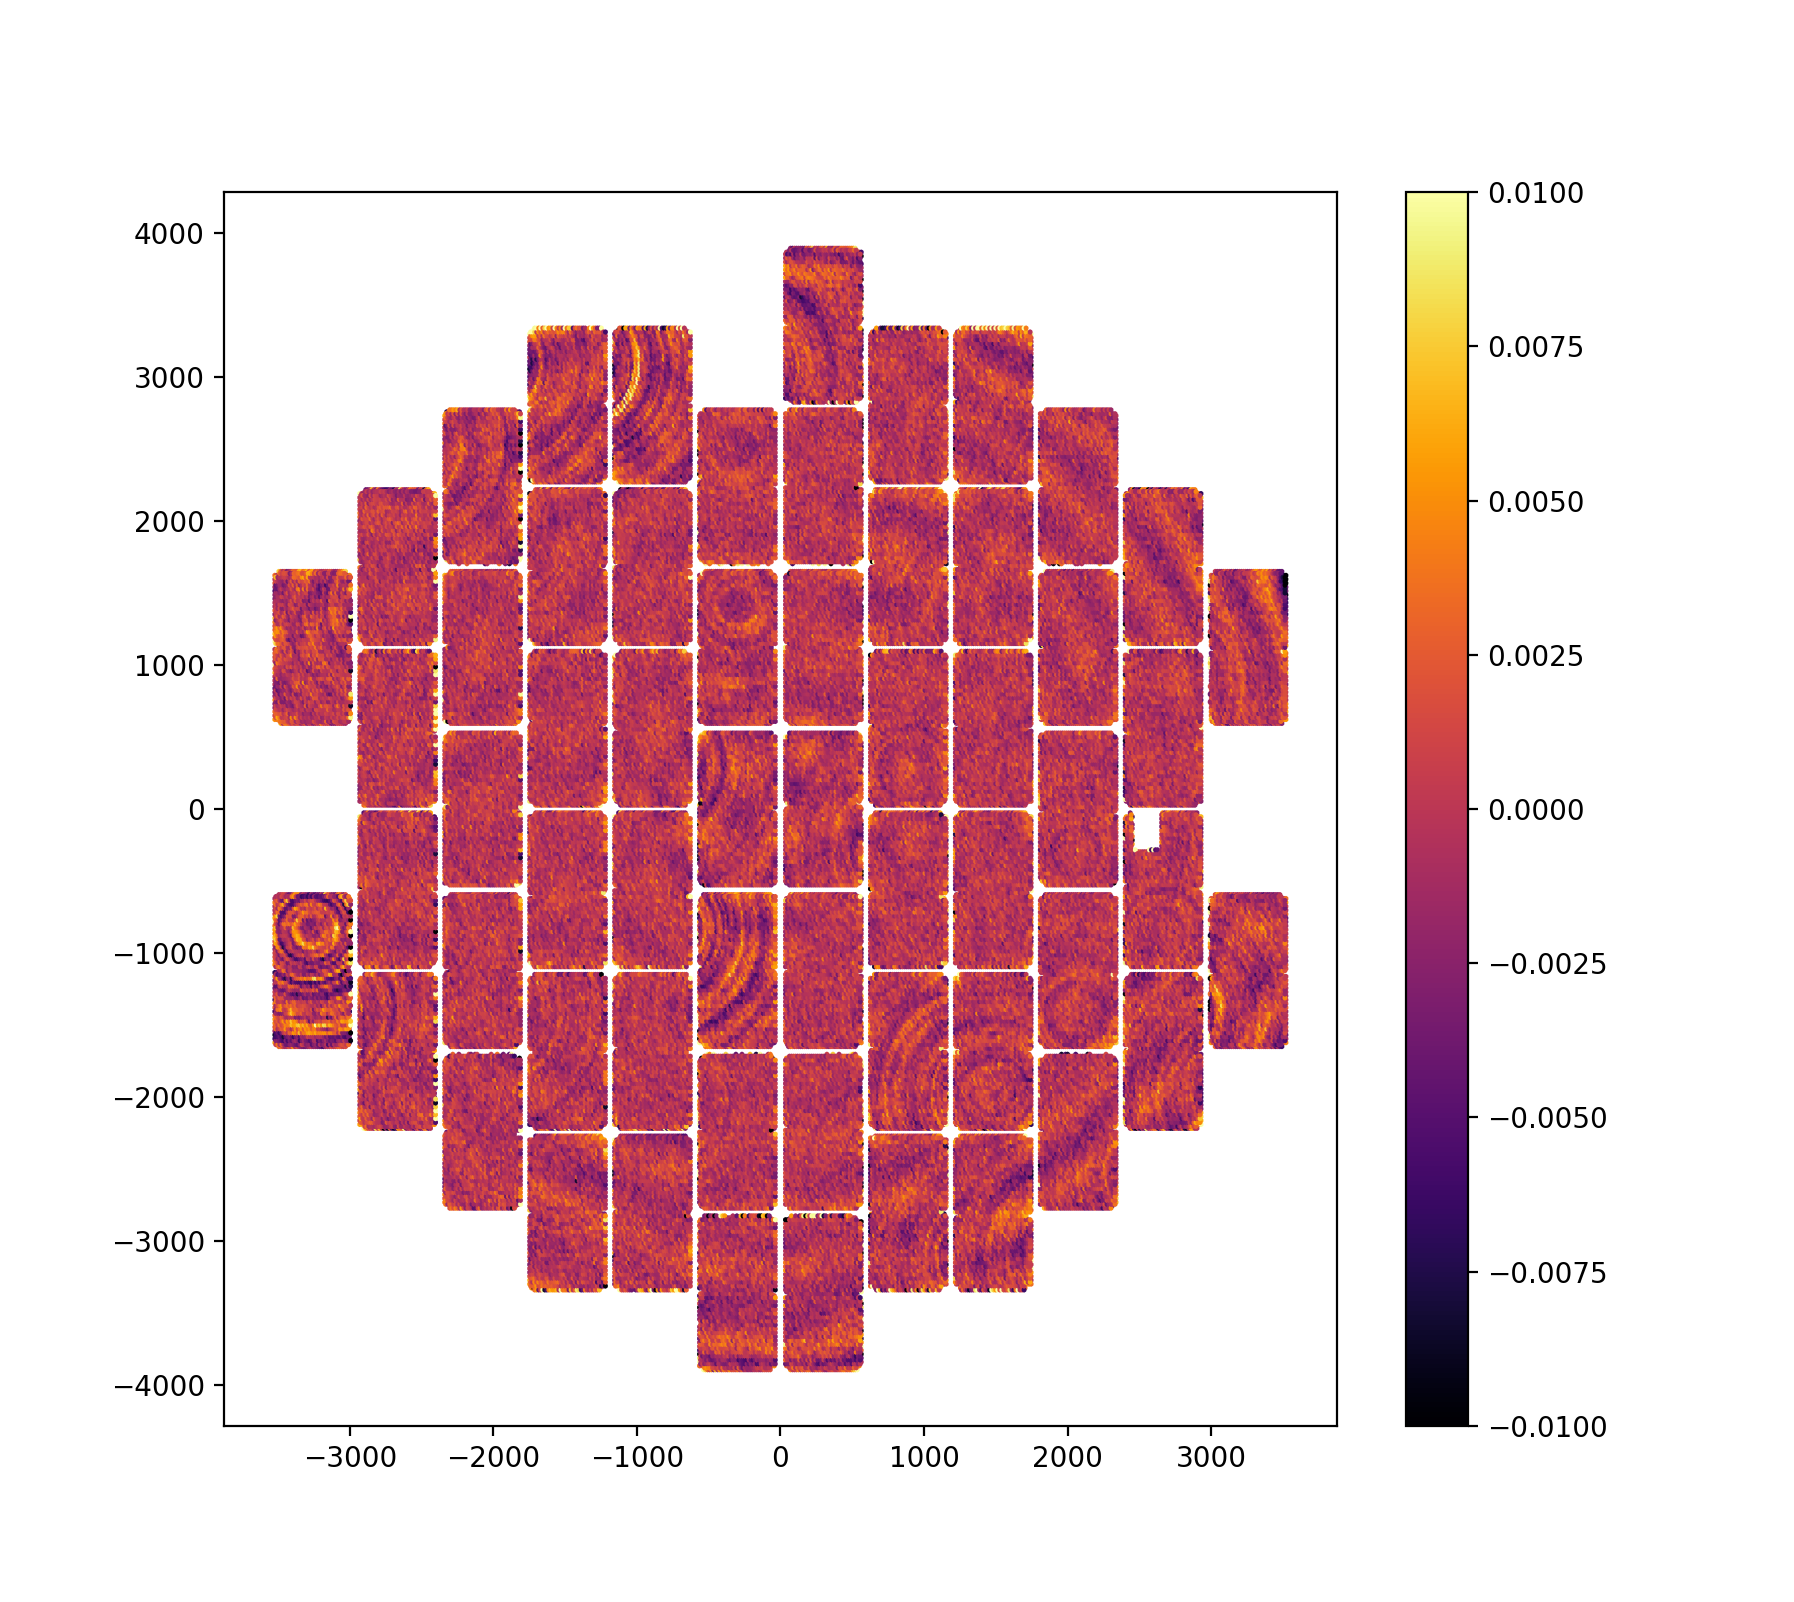

In [11]:
# fov_x and fov_y are in units of arcsec, and x,y are FocalPlane coordinates
f,ax = plt.subplots(1,1,figsize=(9,8))
ngrid = 500
vmax = 0.01
cset = ax.hexbin(itable['fov_x'], itable['fov_y'], itable['obs_T']-itable['piff_T'], gridsize=ngrid, cmap='inferno', vmin=-vmax, vmax=vmax)
f.colorbar(cset,ax=ax)